Logistic Regression to predict Heart Disease 

In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [101]:
df = pd.read_csv("framingham.csv")
df.shape

(4238, 16)

In [102]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [103]:
df.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [104]:
df.TenYearCHD.value_counts(normalize=True)*100

0    84.804153
1    15.195847
Name: TenYearCHD, dtype: float64

In [105]:
df.TenYearCHD.value_counts()

0    3594
1     644
Name: TenYearCHD, dtype: int64

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [107]:
cols = ['male', 'diabetes', 'totChol'] #how many were male, how many had diabetes, what were their cholestrol levels
for c in cols:
    print(df[c].value_counts(),"\n")
    print(df[c].value_counts(normalize=True)*100)
    print("="*70)

0    2419
1    1819
Name: male, dtype: int64 

0    57.078811
1    42.921189
Name: male, dtype: float64
0    4129
1     109
Name: diabetes, dtype: int64 

0    97.428032
1     2.571968
Name: diabetes, dtype: float64
240.0    85
220.0    70
260.0    62
210.0    61
232.0    59
         ..
392.0     1
405.0     1
359.0     1
398.0     1
119.0     1
Name: totChol, Length: 248, dtype: int64 

240.0    2.029608
220.0    1.671442
260.0    1.480420
210.0    1.456543
232.0    1.408787
           ...   
392.0    0.023878
405.0    0.023878
359.0    0.023878
398.0    0.023878
119.0    0.023878
Name: totChol, Length: 248, dtype: float64


In [108]:
plt.scatter(df.index,df['totChol'])
plt.show()

In [109]:
plt.hist(df['totChol'])

(array([1.640e+02, 1.553e+03, 1.898e+03, 5.030e+02, 6.000e+01, 7.000e+00,
        1.000e+00, 0.000e+00, 1.000e+00, 1.000e+00]),
 array([107. , 165.9, 224.8, 283.7, 342.6, 401.5, 460.4, 519.3, 578.2,
        637.1, 696. ]),
 <BarContainer object of 10 artists>)

In [110]:
df.isna().sum() #no. of missing values 

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [111]:
df.isna().sum().sort_values(ascending=False)

glucose            388
education          105
BPMeds              53
totChol             50
cigsPerDay          29
BMI                 19
heartRate            1
male                 0
age                  0
currentSmoker        0
prevalentStroke      0
prevalentHyp         0
diabetes             0
sysBP                0
diaBP                0
TenYearCHD           0
dtype: int64

In [112]:
df.shape

(4238, 16)

In [113]:
df.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [114]:
df = df.dropna() #drop rows with missing values - axis = 0  
df.isna().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [115]:
df.shape

(3656, 16)

FEATURE ENGINEERING 

The overall blood pressure as measured in the brachial artery is maintained by the cardiac output and the total peripheral resistance (TPR) to flow. The mean arterial pressure (MAP) is calculated by the formula:

MAP = (2DBP + SBP)/ 3
where DBP and SBP are diastolic and systolic blood pressure, respectively. Mean arterial pressure is a useful concept because it can be used to calculate overall blood flow, and thus delivery of nutrients to the various organs. It is a good indicator of perfusion pressure (ΔP).

In [116]:
df['MAP'] = (df['sysBP'] + 2*df['diaBP'])/3

In [117]:
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,MAP
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0,82.000000
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0,94.333333
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0,95.833333
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1,113.333333
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0,99.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4231,1,58,3.0,0,0.0,0.0,0,1,0,187.0,141.0,81.0,24.96,80.0,81.0,0,101.000000
4232,1,68,1.0,0,0.0,0.0,0,1,0,176.0,168.0,97.0,23.14,60.0,79.0,1,120.666667
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1,121.000000
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0,95.500000


In [118]:
df.rename(columns = {'male':'Gender'}, inplace = True)

In [119]:
df

,Gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,MAP
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0,82.000000
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0,94.333333
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0,95.833333
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1,113.333333
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0,99.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4231,1,58,3.0,0,0.0,0.0,0,1,0,187.0,141.0,81.0,24.96,80.0,81.0,0,101.000000
4232,1,68,1.0,0,0.0,0.0,0,1,0,176.0,168.0,97.0,23.14,60.0,79.0,1,120.666667
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1,121.000000
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0,95.500000


Now Gender is the column and 1 indicates Male and 0 Female 

In [120]:
df.columns

Index(['Gender', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD', 'MAP'],
      dtype='object')

In [121]:
def get_genderclass(x):
    if x['age']<15:
        return 'child'
    else:
        return x['Gender']


In [122]:
df['GenderClass_UDF'] = df.apply(get_genderclass, axis=1)

In [123]:
df.sample(5)

,Gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,MAP,GenderClass_UDF
4181,1,38,2.0,0,0.0,0.0,0,0,0,235.0,121.0,83.0,25.85,92.0,75.0,0,95.666667,1.0
3377,0,47,1.0,0,0.0,0.0,0,0,0,205.0,133.0,93.0,27.82,68.0,60.0,0,106.333333,0.0
739,1,39,2.0,1,20.0,0.0,0,0,0,188.0,120.0,74.0,26.48,65.0,80.0,0,89.333333,1.0
991,1,39,2.0,1,30.0,0.0,0,0,0,199.0,124.0,86.0,23.39,76.0,72.0,0,98.666667,1.0
3885,0,39,4.0,0,0.0,0.0,0,0,0,181.0,112.0,71.0,21.80,77.0,67.0,0,84.666667,0.0


In [124]:
df.drop(['GenderClass_UDF'], axis=1, inplace=True)
df.head()

,Gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,MAP
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0,82.000000
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0,94.333333
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0,95.833333
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1,113.333333
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0,99.333333


In [125]:
df['GenderClass'] = df.apply(
    lambda x: 'child' if x['age'] < 15 else x['Gender'], axis=1)
df.sample(10)

,Gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,MAP,GenderClass
809,0,60,1.0,1,5.0,0.0,0,1,0,239.0,164.0,94.5,25.01,92.0,89.0,0,117.666667,0.0
84,0,61,1.0,0,0.0,0.0,0,1,0,210.0,182.0,101.0,29.35,70.0,83.0,0,128.000000,0.0
1674,1,56,3.0,0,0.0,0.0,0,0,1,214.0,115.0,80.0,25.09,70.0,292.0,1,91.666667,1.0
3077,0,67,1.0,0,0.0,0.0,0,0,0,223.0,111.0,73.0,27.89,90.0,63.0,1,85.666667,0.0
3555,1,41,1.0,1,20.0,0.0,0,1,0,260.0,151.0,85.0,33.08,95.0,91.0,1,107.000000,1.0
2334,0,40,2.0,0,0.0,0.0,0,0,0,267.0,150.0,93.0,31.77,93.0,74.0,0,112.000000,0.0
4006,1,40,4.0,1,20.0,0.0,0,0,0,242.0,115.0,74.0,23.09,68.0,80.0,0,87.666667,1.0
3410,0,51,4.0,1,10.0,0.0,0,0,0,240.0,112.0,83.0,24.10,75.0,77.0,0,92.666667,0.0
2126,0,51,1.0,1,20.0,0.0,0,1,0,195.0,154.0,96.0,28.38,75.0,75.0,0,115.333333,0.0
2487,0,42,2.0,1,30.0,0.0,0,0,0,201.0,141.0,84.5,26.58,90.0,97.0,0,103.333333,0.0


In [126]:
df.GenderClass.value_counts()

0.0    2034
1.0    1622
Name: GenderClass, dtype: int64

In [127]:
#this implies there was no child in the dataset taken i.e. nobody was below 15 years of age 

In [128]:
#all the above columns I believe are important for the dataset and hence I am not dropping any 

In [129]:
df.corr()

,Gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,MAP,GenderClass
Gender,1.000000,-0.024387,0.017677,0.206778,0.331243,-0.052128,-0.002308,0.000806,0.013833,-0.070229,-0.045484,0.051575,0.072867,-0.114923,0.003048,0.091745,0.005293,1.000000
age,-0.024387,1.000000,-0.158961,-0.210862,-0.189099,0.134670,0.050864,0.306693,0.109027,0.267764,0.388551,0.208880,0.137172,-0.002685,0.118245,0.233810,0.312177,-0.024387
education,0.017677,-0.158961,1.000000,0.025253,0.013527,-0.013647,-0.030353,-0.079100,-0.039547,-0.012956,-0.124511,-0.058502,-0.137280,-0.064254,-0.031874,-0.063068,-0.095396,0.017677
currentSmoker,0.206778,-0.210862,0.025253,1.000000,0.773819,-0.051936,-0.038159,-0.107561,-0.041859,-0.051119,-0.134371,-0.115748,-0.159574,0.050452,-0.053346,0.019176,-0.131903,0.206778
cigsPerDay,0.331243,-0.189099,0.013527,0.773819,1.000000,-0.046479,-0.036283,-0.069890,-0.036934,-0.030222,-0.094764,-0.056650,-0.086888,0.063549,-0.053803,0.052159,-0.079277,0.331243
BPMeds,-0.052128,0.134670,-0.013647,-0.051936,-0.046479,1.000000,0.113119,0.263047,0.049051,0.094011,0.271291,0.199750,0.105603,0.012894,0.054210,0.089116,0.247630,-0.052128
prevalentStroke,-0.002308,0.050864,-0.030353,-0.038159,-0.036283,0.113119,1.000000,0.066098,0.009619,0.012697,0.061080,0.055878,0.036478,-0.017020,0.016051,0.048351,0.061754,-0.002308
prevalentHyp,0.000806,0.306693,-0.079100,-0.107561,-0.069890,0.263047,0.066098,1.000000,0.080623,0.167074,0.697790,0.617634,0.302917,0.147333,0.087129,0.181556,0.694082,0.000806
diabetes,0.013833,0.109027,-0.039547,-0.041859,-0.036934,0.049051,0.009619,0.080623,1.000000,0.048371,0.102574,0.050767,0.088970,0.060996,0.614817,0.093397,0.080004,0.013833
totChol,-0.070229,0.267764,-0.012956,-0.051119,-0.030222,0.094011,0.012697,0.167074,0.048371,1.000000,0.220130,0.174986,0.120799,0.093057,0.049749,0.091127,0.208033,-0.070229


In [130]:
#observe the diagonal elements - every element's correlation with itself is 1 

In [131]:
# One Hot Encoding or Dummification not required on the above data set because all are numerical and not categorical 

<IPython.core.display.Javascript object>


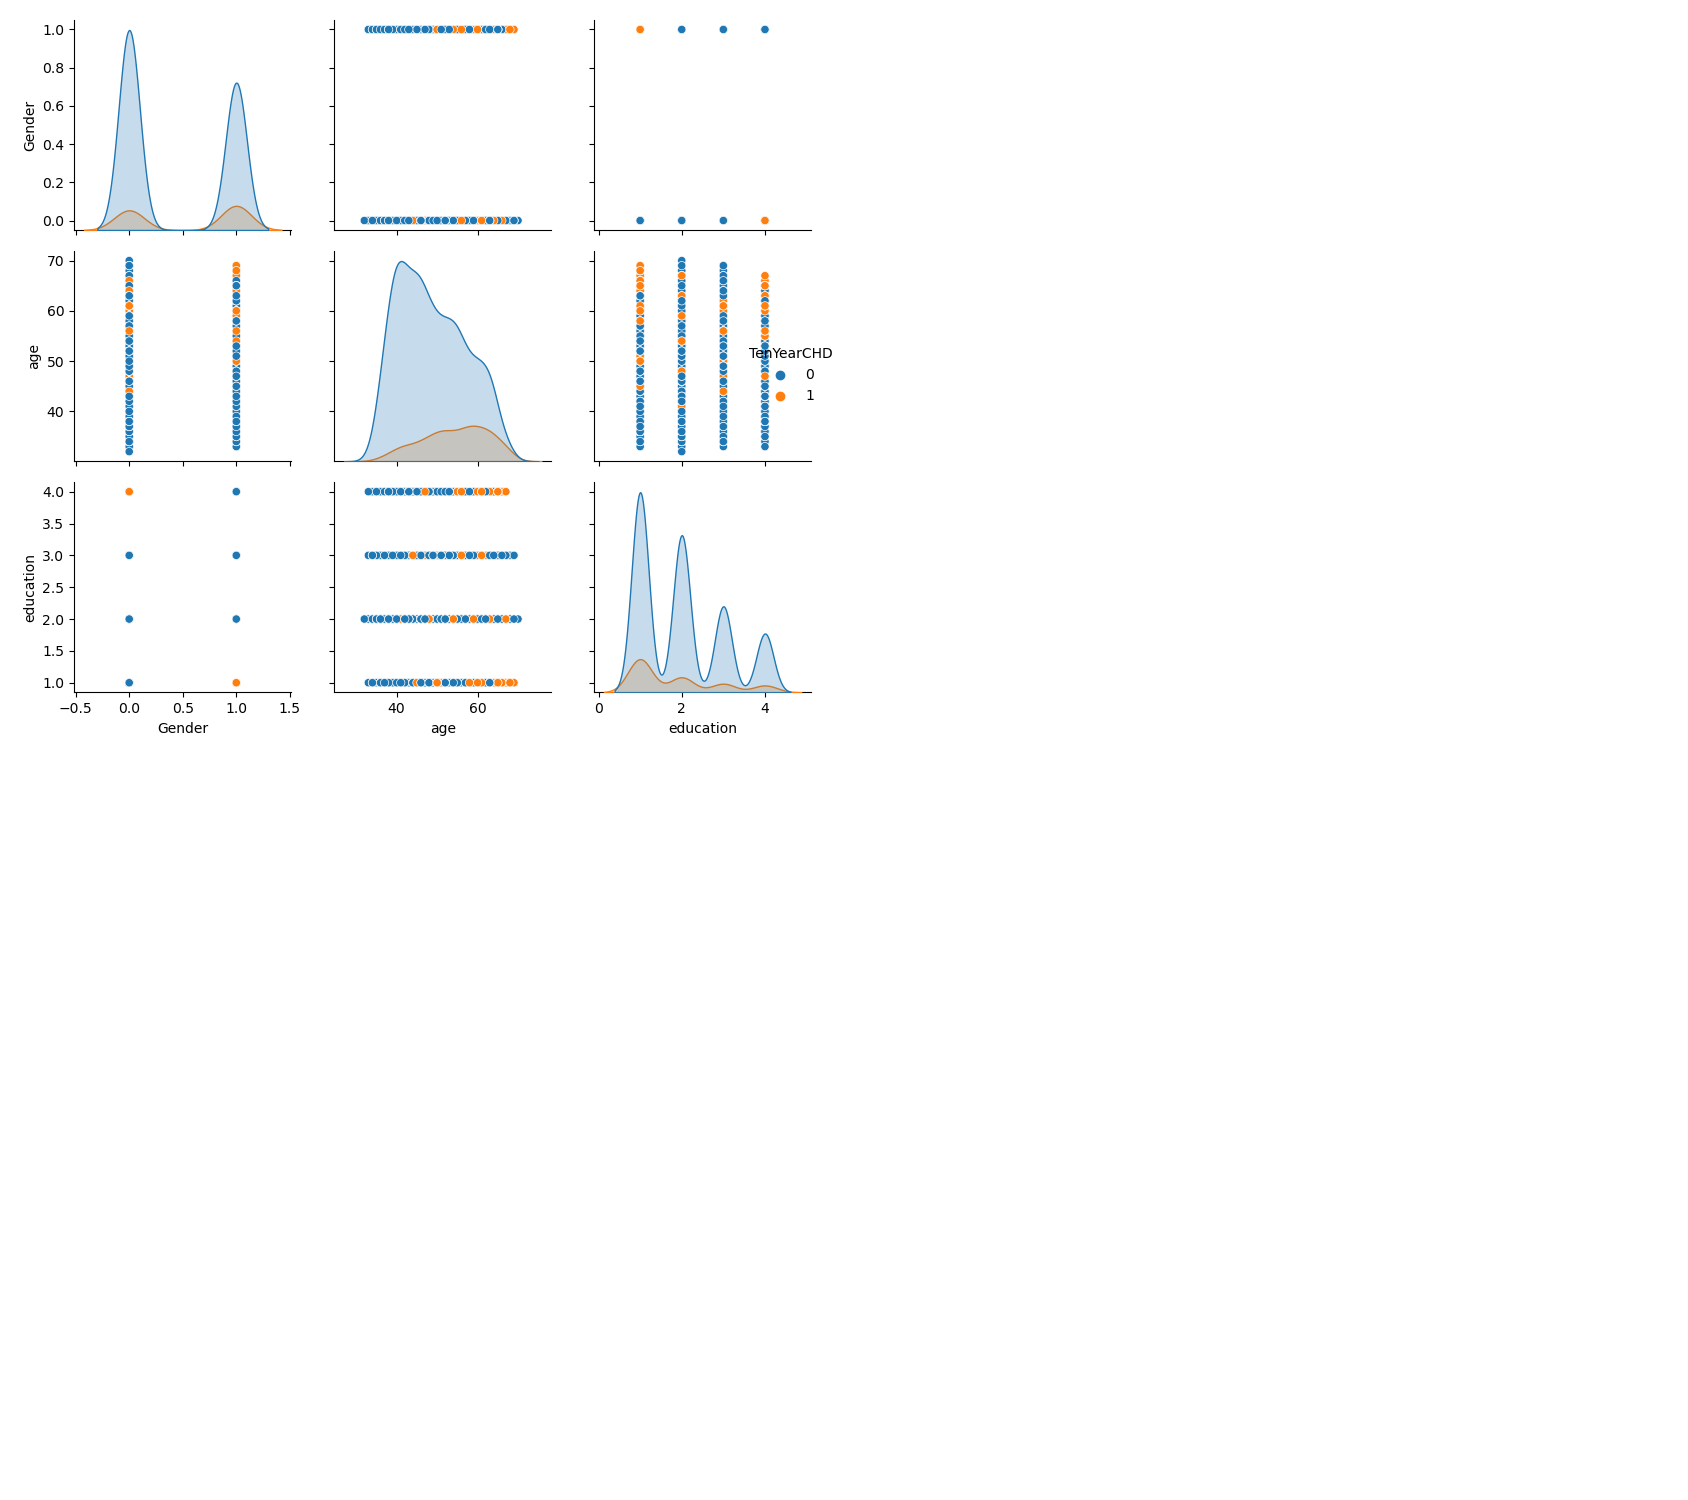

In [132]:
import seaborn as sns
sns.pairplot(df[["Gender","age","education","TenYearCHD"]], vars=["Gender","age","education"], hue ='TenYearCHD')
plt.show()

What is Correllation?
interdependence of variable quantities.

<IPython.core.display.Javascript object>


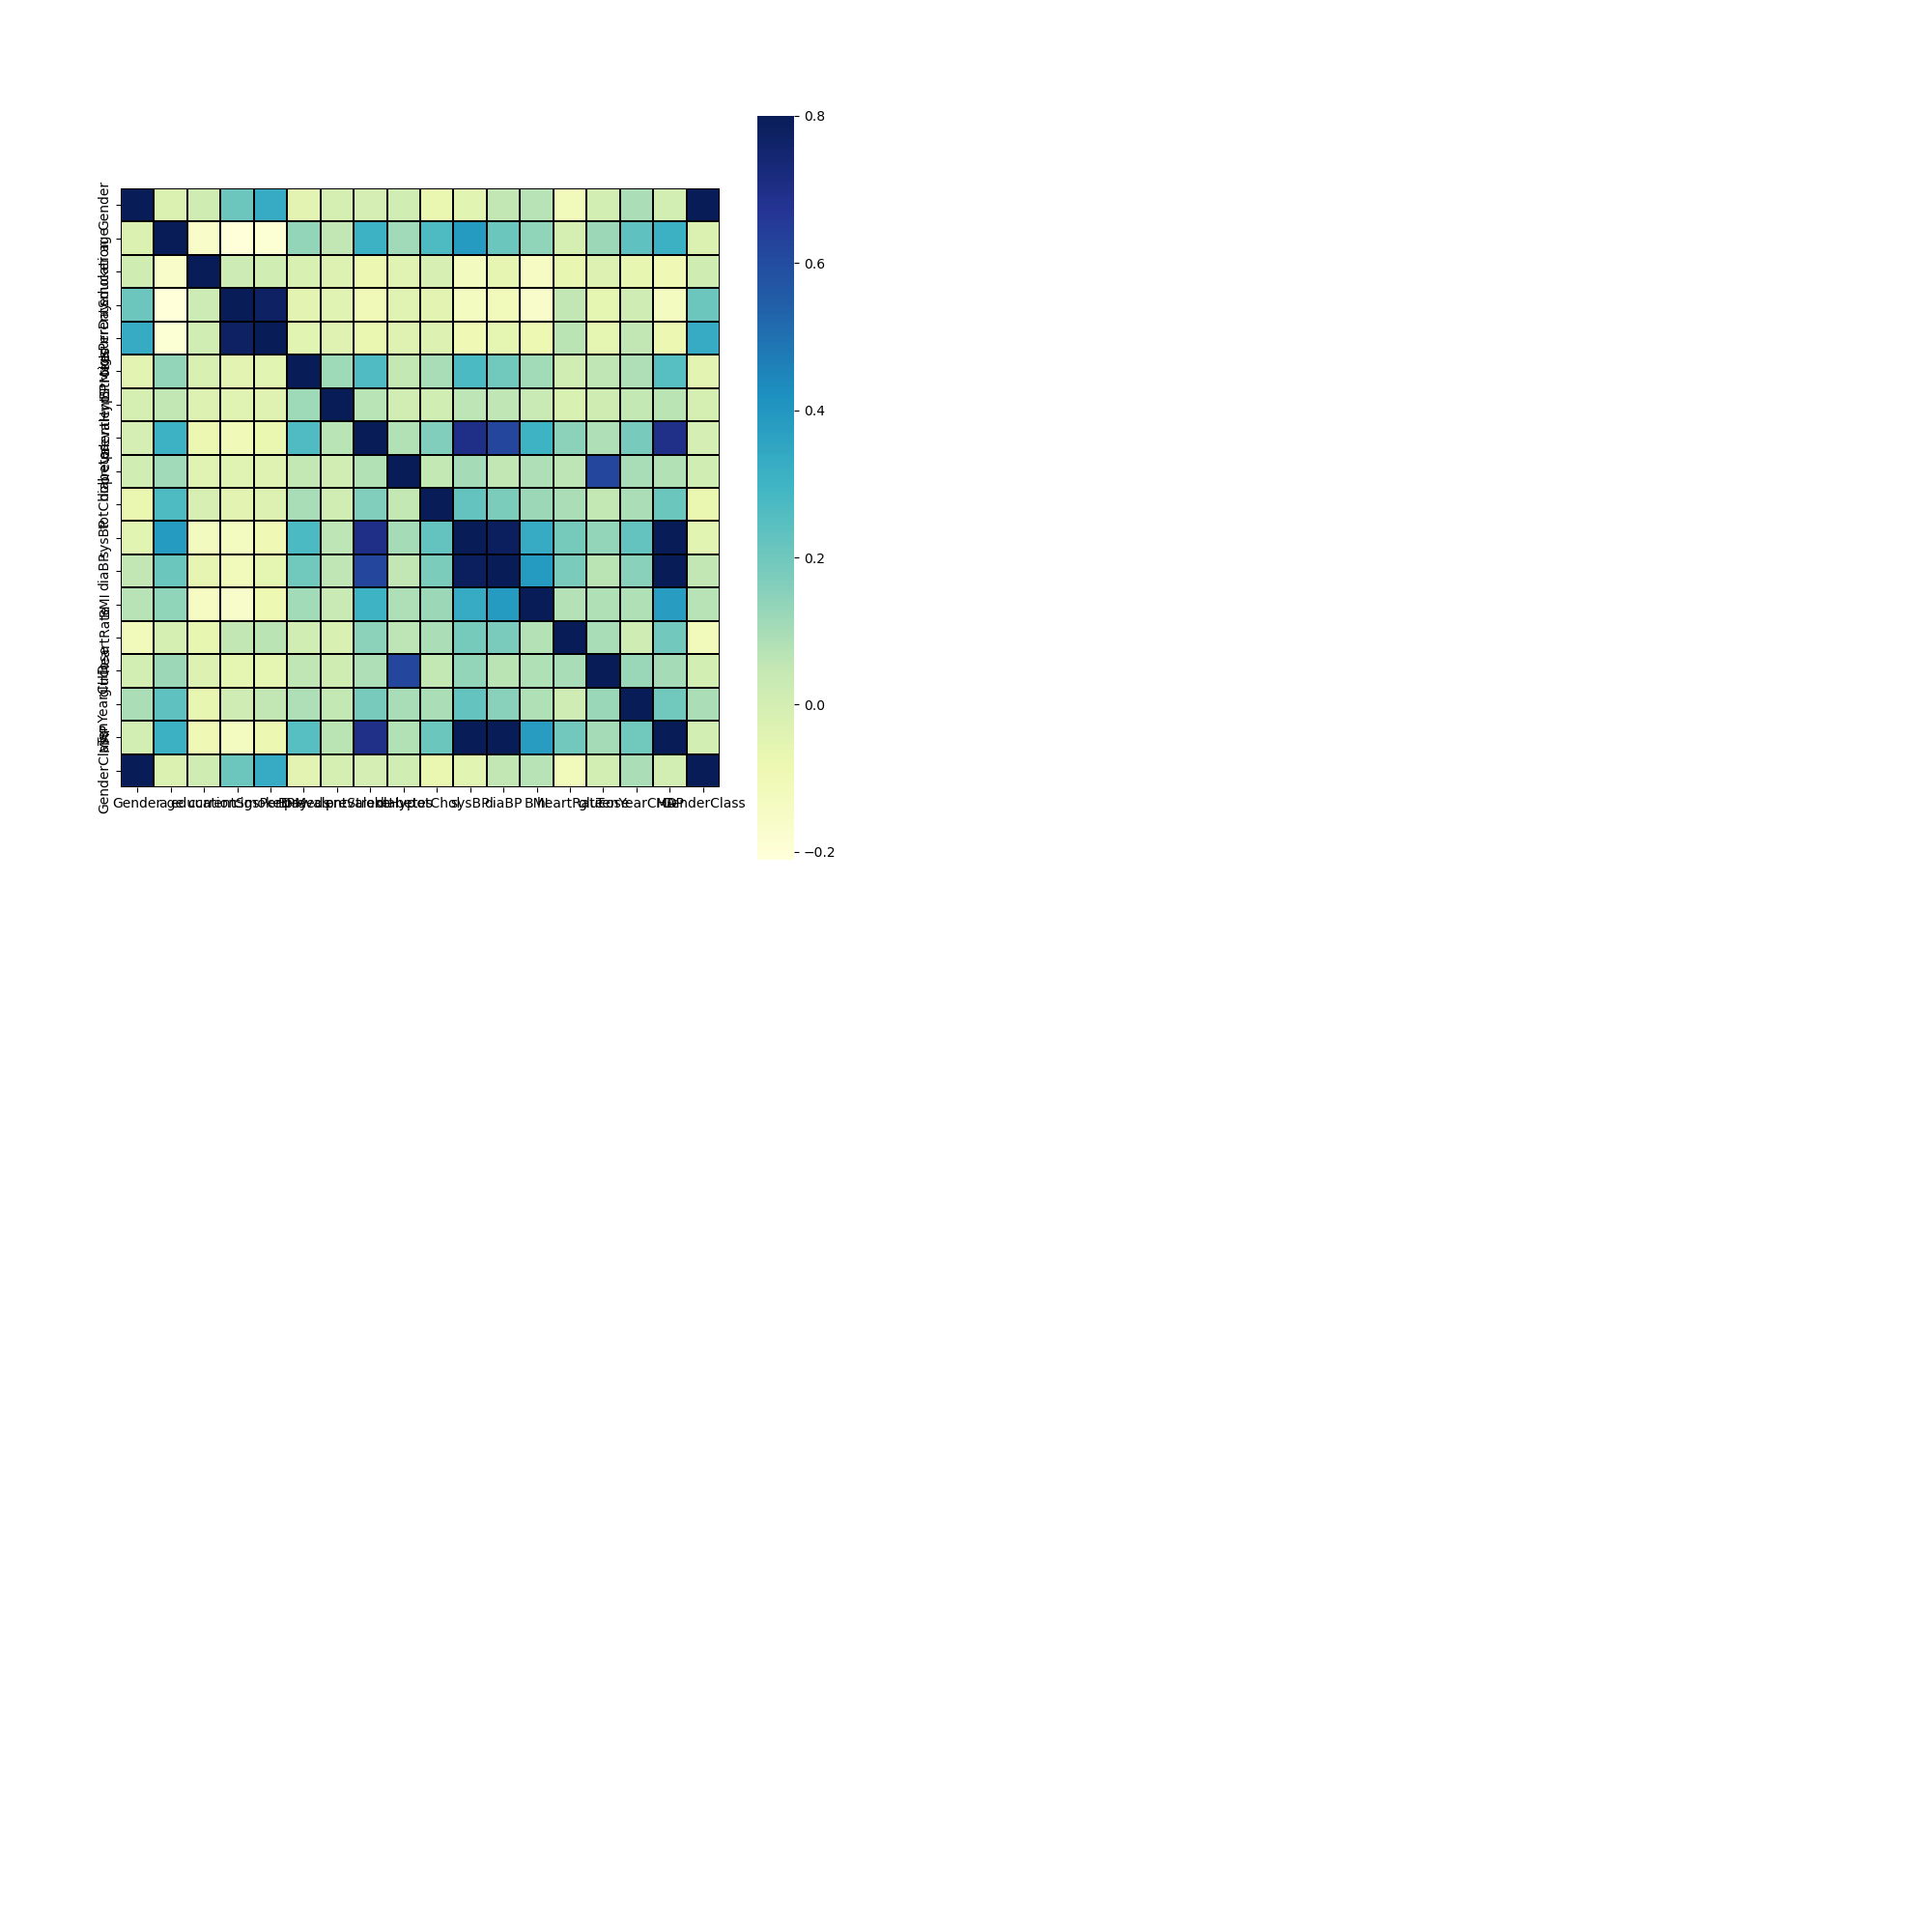

In [133]:
corr = df.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr,
            vmax=.8,
            linewidth=.01,
            square=True,
            annot=True,
            linecolor='black',
            cmap='YlGnBu')
plt.title("Correlation between features")
plt.show()

In [134]:
X = df.loc[:,df.columns != 'TenYearCHD']
X.head()
y = df.TenYearCHD
y

0       0
1       0
2       0
3       1
4       0
       ..
4231    0
4232    1
4233    1
4234    0
4237    0
Name: TenYearCHD, Length: 3656, dtype: int64

In [135]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.20,
                                                    random_state=1)

In [136]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2924, 17), (732, 17), (2924,), (732,))

In [137]:
X_train.head()

,Gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,MAP,GenderClass
4051,1,41,2.0,1,20.0,0.0,0,0,0,206.0,124.0,89.0,27.63,80.0,70.0,100.666667,1.0
3437,1,36,1.0,1,20.0,0.0,0,0,0,203.0,101.5,67.0,24.43,65.0,74.0,78.500000,1.0
459,0,48,4.0,1,9.0,0.0,0,0,0,195.0,109.0,71.0,21.10,73.0,65.0,83.666667,0.0
3765,0,40,2.0,1,20.0,0.0,0,0,0,176.0,99.0,59.0,22.13,65.0,78.0,72.333333,0.0
4006,1,40,4.0,1,20.0,0.0,0,0,0,242.0,115.0,74.0,23.09,68.0,80.0,87.666667,1.0


In [138]:
# Normalisation methods - min max scaling and using standard scaler (latter is better)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[['age']] = sc.fit_transform(X_train[['age']])
X_test[['age']] = sc.transform(X_test[['age']])

In [139]:
X_train.head()

,Gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,MAP,GenderClass
4051,1,-0.998957,2.0,1,20.0,0.0,0,0,0,206.0,124.0,89.0,27.63,80.0,70.0,100.666667,1.0
3437,1,-1.586201,1.0,1,20.0,0.0,0,0,0,203.0,101.5,67.0,24.43,65.0,74.0,78.500000,1.0
459,0,-0.176816,4.0,1,9.0,0.0,0,0,0,195.0,109.0,71.0,21.10,73.0,65.0,83.666667,0.0
3765,0,-1.116406,2.0,1,20.0,0.0,0,0,0,176.0,99.0,59.0,22.13,65.0,78.0,72.333333,0.0
4006,1,-1.116406,4.0,1,20.0,0.0,0,0,0,242.0,115.0,74.0,23.09,68.0,80.0,87.666667,1.0


In [140]:
X_test.head()

,Gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,MAP,GenderClass
1614,0,1.702365,2.0,0,0.0,0.0,0,1,0,254.0,196.0,119.0,35.22,100.0,79.0,144.666667,0.0
860,0,-1.703650,2.0,0,0.0,0.0,0,0,0,248.0,107.0,73.0,20.64,90.0,80.0,84.333333,0.0
646,1,-1.351304,2.0,0,0.0,0.0,1,0,0,224.0,127.5,81.0,20.39,80.0,90.0,96.500000,1.0
3666,1,1.232569,1.0,0,0.0,0.0,0,1,0,226.0,155.0,92.5,30.85,80.0,87.0,113.333333,1.0
112,1,-0.176816,4.0,0,0.0,0.0,0,0,0,233.0,138.0,88.5,23.62,86.0,68.0,105.000000,1.0


In [141]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [142]:
logreg

LogisticRegression()

In [143]:
y_pred_train = logreg.predict(X_train)
y_pred_test = logreg.predict(X_test)

In [144]:
pd.DataFrame(zip(y_train, y_pred_train), columns=['Actual','Predicted'])

,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
2919,0,0
2920,0,0
2921,1,0
2922,0,0


In [145]:
pd.DataFrame(zip(y_test, y_pred_test), columns=['Actual','Predicted'])

,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
727,0,0
728,0,0
729,0,0
730,0,0


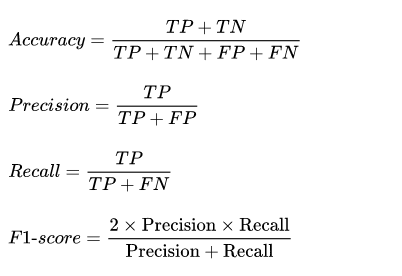

In [146]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [147]:
# Accuracy on train data
accuracy_score(y_train, y_pred_train)

0.8467852257181943

In [148]:
# Accuracy on test data
accuracy_score(y_test, y_pred_test)

0.8633879781420765

In [149]:
confusion_matrix(y_test, y_pred_test)

array([[625,   2],
       [ 98,   7]], dtype=int64)

In [150]:
cm = pd.DataFrame(confusion_matrix(y_test, y_pred_test))
cm

,0,1
0,625,2
1,98,7


In [151]:
cm.index = ['Actual Survived', 'Actual HA']
cm.columns = ['Predicted Survived', 'Predicted HA']
cm

,Predicted Survived,Predicted HA
Actual Survived,625,2
Actual HA,98,7


In [152]:
(625+7)/(100+632)

0.8633879781420765

In [153]:
#YES! Its a Match

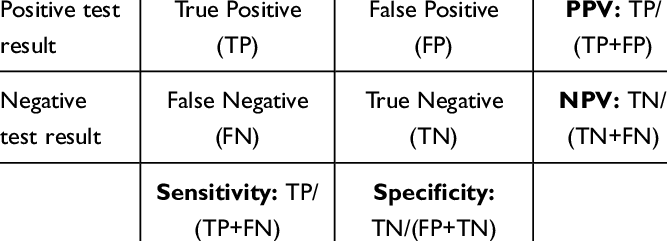

AUC-ROC curve helps us visualize how well our machine learning classifier performs. Although it works only for binary classification problems, we will see how we can extend it to evaluate multi-class classification problems.
ROC basically is a plot of Sensitivity vs 1-Specificity - it shows how confusion matrices change with change in threshold value and hence which threshold value is the best 
AUC is basically a method to check which classifier is better or which categorization algorithm worked better, the one that gives the Area Under the Curve more is better (for eg. Logistic regression v/s Random Forest Classifier) 

In [154]:
from sklearn.metrics import roc_curve, precision_recall_curve, roc_auc_score

In [155]:
fpr,tpr,thres = roc_curve(y_test, y_pred_test)
print(fpr," || ",tpr," || ",thres)

[0.         0.00318979 1.        ]  ||  [0.         0.06666667 1.        ]  ||  [2 1 0]


In [156]:
print(roc_auc_score(y_test, y_pred_test)) #The higher the AUC, the better the model's performance at distinguishing between the positive and negative classes. An AUC score of 1 means the classifier can perfectly distinguish between all the Positive and the Negative class points.

0.531738437001595


<IPython.core.display.Javascript object>


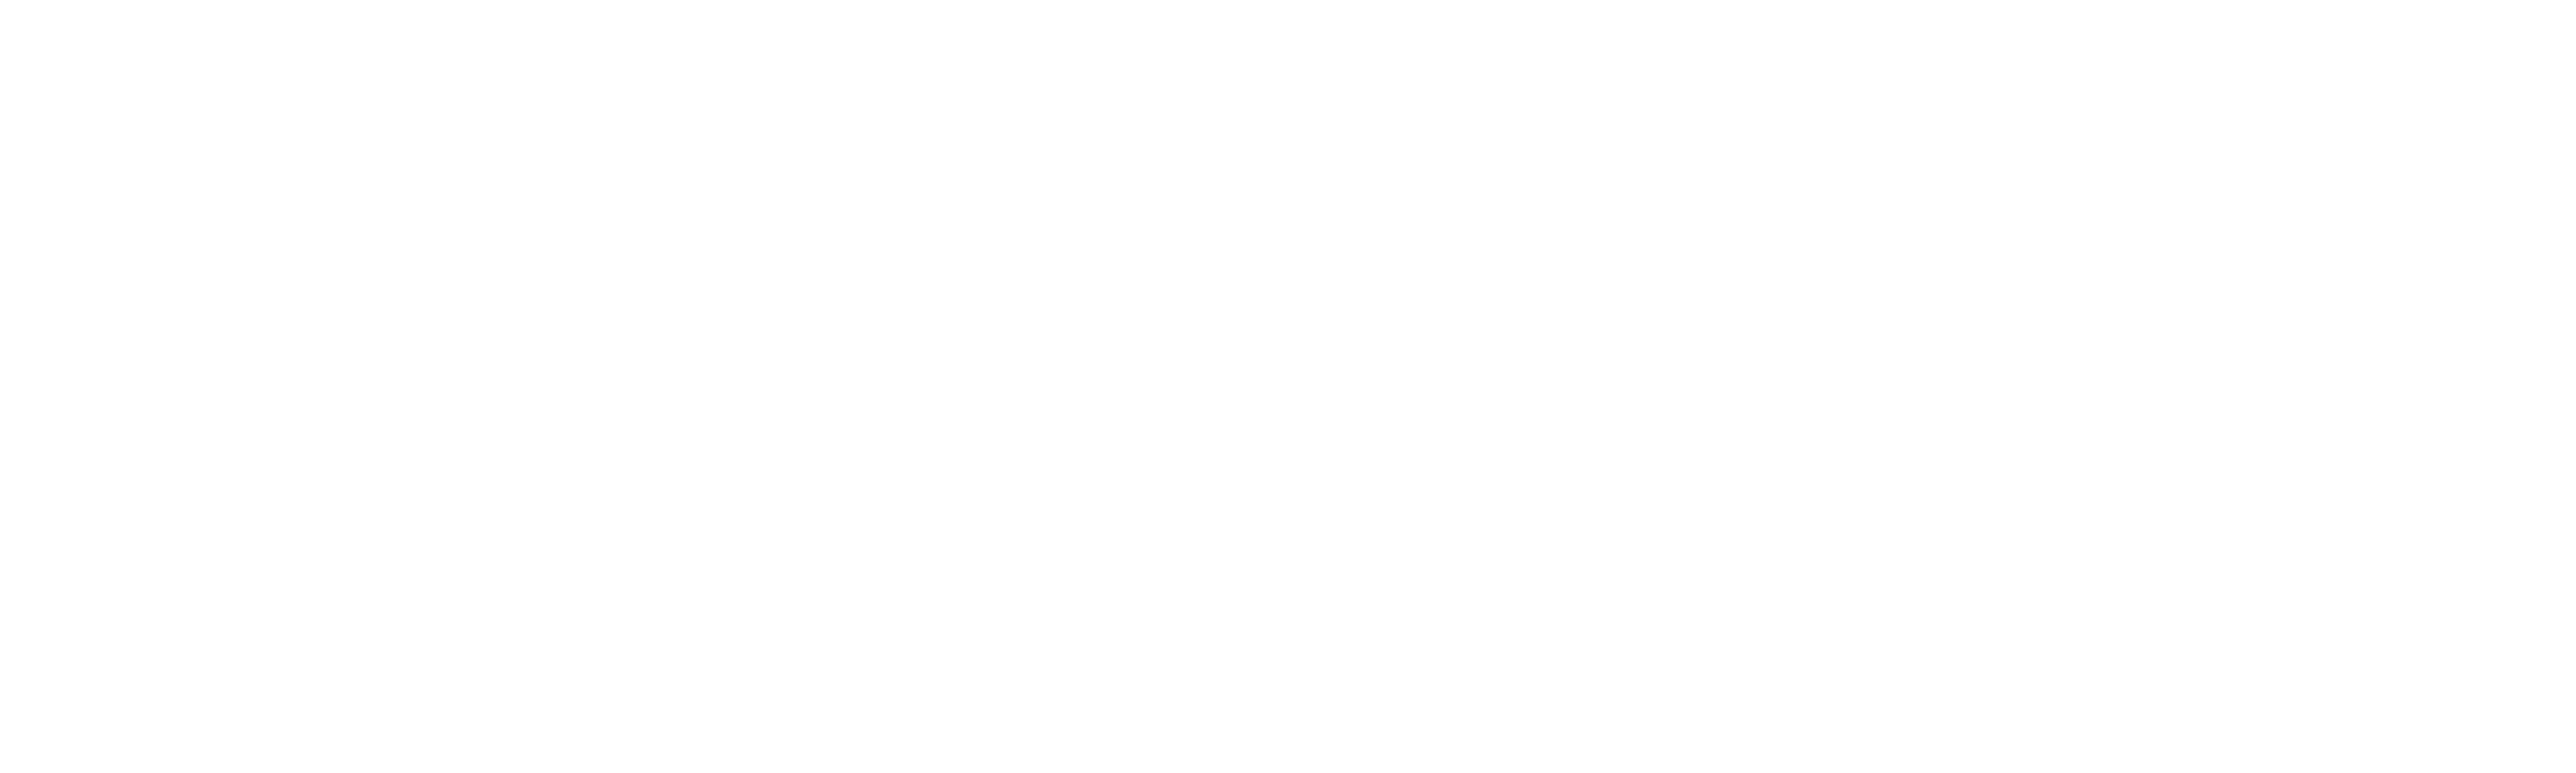

0.531738437001595


In [157]:
fpr_log,tpr_log,thres_log = roc_curve(y_test, y_pred_test)

fig, ax = plt.subplots(1,2,figsize=(20,6))
ax[0].plot(fpr_log,tpr_log)
ax[0].plot([0, 1], ls="--")
ax[0].plot([0, 0], [1, 0] , c=".7")
ax[0].plot([1, 1] , c=".7")
ax[0].set_ylabel('True Positive Rate')
ax[0].set_xlabel('False Positive Rate')
print(roc_auc_score(y_test, y_pred_test))

plt.show()

In [158]:
logreg.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [159]:
logreg.predict_proba(X_test)

array([[0.8346202 , 0.1653798 ],
       [0.97515555, 0.02484445],
       [0.93194947, 0.06805053],
       ...,
       [0.83638322, 0.16361678],
       [0.76894017, 0.23105983],
       [0.53934517, 0.46065483]])

In [160]:
logreg.predict_proba(X_test)[:,1]

array([0.1653798 , 0.02484445, 0.06805053, 0.30431317, 0.07874635,
       0.05252364, 0.40330749, 0.10317785, 0.06802598, 0.12072771,
       0.2004254 , 0.18716437, 0.08963659, 0.06677288, 0.13281708,
       0.14011498, 0.0659156 , 0.07255514, 0.07054376, 0.22774218,
       0.09006168, 0.18875746, 0.22425023, 0.18810729, 0.47985756,
       0.11388639, 0.09783502, 0.08203121, 0.21310534, 0.07092408,
       0.17234168, 0.1100205 , 0.13973212, 0.47205673, 0.02154562,
       0.04346081, 0.13042688, 0.14730609, 0.12950675, 0.0717862 ,
       0.0532261 , 0.04569982, 0.07734398, 0.11353629, 0.17806002,
       0.23098001, 0.21665981, 0.08949846, 0.09466543, 0.18886966,
       0.1759775 , 0.17183391, 0.05139612, 0.06945033, 0.21423898,
       0.09123594, 0.15573636, 0.05734371, 0.6142216 , 0.07269195,
       0.14848464, 0.0997437 , 0.04673594, 0.03221963, 0.23917316,
       0.06794703, 0.11618559, 0.15652505, 0.43365583, 0.18496184,
       0.19601729, 0.15914968, 0.02367027, 0.32853906, 0.12702

In [161]:
logreg.predict_proba(X_test)[:,1] > 0.5

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [162]:
np.where(logreg.predict_proba(X_test)[:,1] > 0.50, 1, 0)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [163]:
logreg.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

Setting Threshold to 0.75

In [164]:
preds1 = np.where(logreg.predict_proba(X_test)[:,1] > 0.75, 1, 0)
preds1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [165]:
accuracy_score(y_test, preds1)

0.8592896174863388

Setting threshold to 0.25

In [166]:
preds2 = np.where(logreg.predict_proba(X_test)[:,1] > 0.25, 1, 0)
preds2

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,

In [167]:
accuracy_score(y_test, preds2)

0.8155737704918032

In [168]:
numbers = [float(x)/10 for x in range(10)]
numbers

[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

In [169]:
y_pred_test = logreg.predict_proba(X_test)[:,1]

In [170]:
pred_val = np.where(logreg.predict_proba(X_test)[:,1] > 0.50, 1, 0)

In [171]:
cutoff_df = pd.DataFrame(zip(y_test, y_pred_test, pred_val), columns=['Actual','Predicted_Prob', 'Predicted'])
cutoff_df

,Actual,Predicted_Prob,Predicted
0,0,0.165380,0
1,0,0.024844,0
2,0,0.068051,0
3,0,0.304313,0
4,0,0.078746,0
...,...,...,...
727,0,0.065499,0
728,0,0.257810,0
729,0,0.163617,0
730,0,0.231060,0


In [172]:
# Let's calculate Sensitivity, Specificity and accuracy with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]

for i in numbers:
    cutoff_df[i]= cutoff_df.Predicted_Prob.map(lambda x: 1 if x > i else 0)
cutoff_df.head()

,Actual,Predicted_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.165380,0,1,1,0,0,0,0,0,0,0,0
1,0,0.024844,0,1,0,0,0,0,0,0,0,0,0
2,0,0.068051,0,1,0,0,0,0,0,0,0,0,0
3,0,0.304313,0,1,1,1,1,0,0,0,0,0,0
4,0,0.078746,0,1,0,0,0,0,0,0,0,0,0


In [173]:
cutoff_df.shape

(732, 13)

In [174]:
from sklearn.metrics import confusion_matrix
# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
cutoff_df1 = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
for i in num:
    cm1 = confusion_matrix(cutoff_df.Actual, cutoff_df[i])
    total1=sum(sum(cm1))
    Accuracy = (cm1[0,0]+cm1[1,1])/total1
    Specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    Sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df1.loc[i] =[ i ,Accuracy,Sensitivity,Specificity]

In [175]:
cutoff_df1

,prob,accuracy,sensi,speci
0.0,0.0,0.143443,1.000000,0.000000
0.1,0.1,0.515027,0.895238,0.451356
0.2,0.2,0.744536,0.600000,0.768740
0.3,0.3,0.819672,0.333333,0.901116
0.4,0.4,0.848361,0.152381,0.964912
0.5,0.5,0.863388,0.066667,0.996810
0.6,0.6,0.860656,0.028571,1.000000
0.7,0.7,0.859290,0.019048,1.000000
0.8,0.8,0.857923,0.009524,1.000000
0.9,0.9,0.856557,0.000000,1.000000


<IPython.core.display.Javascript object>


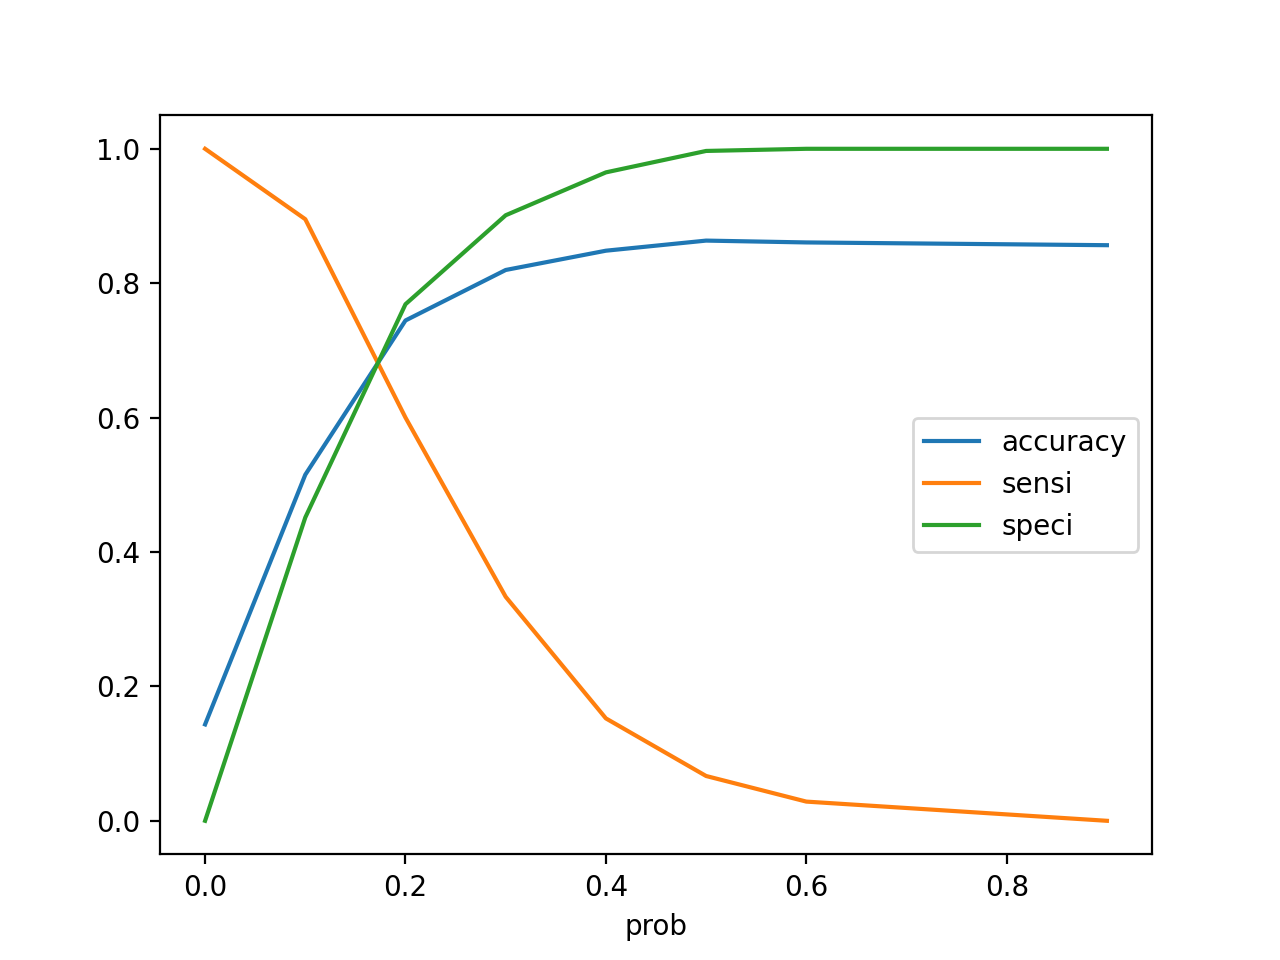

In [176]:
# Let's plot it as well
%matplotlib notebook
cutoff_df1.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [177]:
preds3 = np.where(logreg.predict_proba(X_test)[:,1] > 0.17, 1, 0)
preds3

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,

In [178]:
accuracy_score(y_test, preds3)

0.6885245901639344